# using K-means for similarity detection on lobes

[KMeans - doc](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
panMatrix = pd.read_csv("lobe-2.csv")
panMatrix.tail()

,patient,nodes,edges,nodeQuotient,edgeQuotient
69,3159855,72,67,5.208333,5.582090
70,3180368,60,57,4.700000,4.929825
71,3180687,35,32,5.085714,5.531250
72,3133592,74,71,4.337838,4.507042
73,3180185,82,79,4.097561,4.240506


[MinMaxScaler - doc](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmaxscaler#sklearn.preprocessing.MinMaxScaler)

In [5]:
scaler = MinMaxScaler()

scaler.fit(panMatrix[['nodes']])
panMatrix['nodes'] = scaler.transform(panMatrix[['nodes']])

scaler.fit(panMatrix[['nodeQuotient']])
panMatrix['nodeQuotient'] = scaler.transform(panMatrix[['nodeQuotient']])

In [6]:
panMatrix.tail()

,patient,nodes,edges,nodeQuotient,edgeQuotient
69,3159855,0.309179,67,0.201966,5.582090
70,3180368,0.251208,57,0.144357,4.929825
71,3180687,0.130435,32,0.188070,5.531250
72,3133592,0.318841,71,0.103313,4.507042
73,3180185,0.357488,79,0.076082,4.240506


## getting best value of k (elbow)

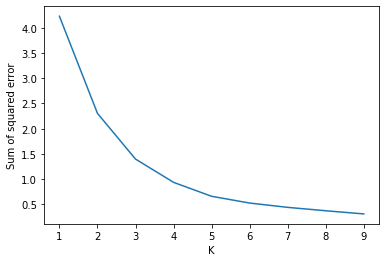

In [7]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(panMatrix[['nodeQuotient','nodes']])
    sse.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## KMeans and plotting

Text(0, 0.5, 'nodes')

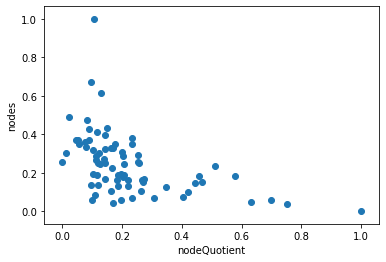

In [8]:
plt.scatter(panMatrix['nodeQuotient'],panMatrix['nodes'])
plt.xlabel('nodeQuotient')
plt.ylabel('nodes')

In [9]:
kmeans = KMeans(n_clusters = 5, max_iter=300)
y_predicted = kmeans.fit_predict(panMatrix[['nodeQuotient','nodes']])
y_predicted

array([2, 2, 2, 0, 3, 1, 1, 0, 3, 0, 0, 0, 2, 0, 2, 2, 0, 0, 3, 0, 2, 2,
       2, 2, 0, 4, 2, 0, 4, 3, 2, 0, 3, 2, 3, 0, 4, 2, 2, 2, 0, 2, 0, 0,
       1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 3, 2, 2, 0, 2, 1, 2,
       3, 2, 2, 0, 0, 2, 0, 0], dtype=int32)

In [10]:
panMatrix['cluster']=y_predicted
panMatrix.tail()

,patient,nodes,edges,nodeQuotient,edgeQuotient,cluster
69,3159855,0.309179,67,0.201966,5.582090,0
70,3180368,0.251208,57,0.144357,4.929825,0
71,3180687,0.130435,32,0.188070,5.531250,2
72,3133592,0.318841,71,0.103313,4.507042,0
73,3180185,0.357488,79,0.076082,4.240506,0


In [11]:
kmeans.cluster_centers_

array([[0.12225918, 0.33847592],
       [0.77086043, 0.03623188],
       [0.19405036, 0.15079365],
       [0.45416996, 0.14975845],
       [0.11097626, 0.76167472]])

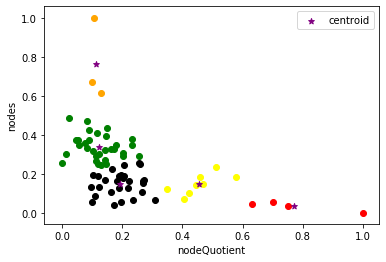

In [12]:
panC1 = panMatrix[panMatrix.cluster==0]
panC2 = panMatrix[panMatrix.cluster==1]
panC3 = panMatrix[panMatrix.cluster==2]
panC4 = panMatrix[panMatrix.cluster==3]
panC5 = panMatrix[panMatrix.cluster==4]
plt.scatter(panC1.nodeQuotient,panC1.nodes,color='green')
plt.scatter(panC2.nodeQuotient,panC2.nodes,color='red')
plt.scatter(panC3.nodeQuotient,panC3.nodes,color='black')
plt.scatter(panC4.nodeQuotient,panC4.nodes,color='yellow')
plt.scatter(panC5.nodeQuotient,panC5.nodes,color='orange')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('nodeQuotient')
plt.ylabel('nodes')
plt.legend()